Valeur de la bande interdite: 2.1883999999999997 eV


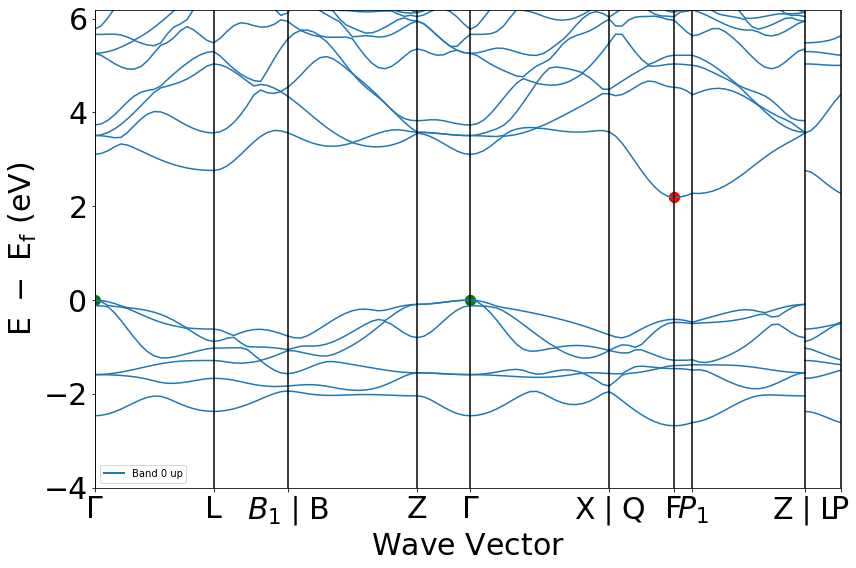

In [39]:
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer, PointGroupAnalyzer
from pymatgen.util.coord import pbc_shortest_vectors
from pymatgen.util.num import abs_cap
from pymatgen.util.typing import Vector3Like
from pymatgen.ext.matproj import MPRester
from pymatgen.io.cif import CifParser
from pymatgen.core.lattice import Lattice
from pymatgen.core.sites import Site
from pymatgen.core.structure import IMolecule
from IPython.display import Image
from pymatgen.core.operations import SymmOp
from pymatgen.analysis.diffraction.core import AbstractDiffractionPatternCalculator, DiffractionPattern
from pymatgen.analysis.diffraction.xrd import XRDCalculator
from pymatgen.core.spectrum import Spectrum
from pymatgen.electronic_structure.bandstructure import BandStructure, BandStructureSymmLine
from pymatgen.symmetry.bandstructure import HighSymmKpath
from pymatgen.electronic_structure.plotter import *

import matplotlib.pyplot as plt
import numpy as np
import scipy.constants as sc
import matplotlib.image as mpimg
import math
import pymatgen.analysis.diffraction.core as dpanc
import pymatgen.analysis.diffraction.xrd as dpan
import pymatgen.symmetry.analyzer as span
with MPRester("eKJMKclFzVrDeK1fBnBn") as m:

    # Structure du matériau grâce à son code depuis le site MaterialProject
    structure = m.get_structure_by_material_id("mp-9082")
    # Structure de bande du matériaux grâce à son code depuis le site MaterialProject 
    bandstructure = m.get_bandstructure_by_material_id("mp-9082")
    #Bande interdite
    gap=bandstructure.get_band_gap()
    print('Valeur de la bande interdite:', gap['energy'], 'eV')
    #Image de La structure de bandes
    Imbandstructure = BSPlotter(bandstructure) #BSPlotter object
    Imbandstructure.get_plot(vbm_cbm_marker=True)   

In [40]:
#Détermination des bandes de valences qui contiennent l'énergie la plus haute et des bandes de conduction qui contiennent l'énergie la plus basse
Ebranches = Imbandstructure.bs_plot_data()['energy'] #Tableau qui contient les énergies des branches
Absbranches = Imbandstructure.bs_plot_data()['distances'] #Tableau qui contient les abscisses des branches
print('\n',bandstructure.get_vbm()['band_index'] , "\n ==> Les bandes de valence 14 et 15 contiennent l'énergie la plus haute")
print('\n',bandstructure.get_cbm()['band_index'] , "\n ==> La bande de conduction 16 contient l'énergie la plus basse")
#print(BranchEnergies)
#print(len(BranchEnergies['1']))
#print(Branchk)

#Recherche des directions qui présente le plus et le moins de dispersion pour les bandes déterminées au dessus
def absoluteslope(y,x): #Retourne une pente en valeur absolue
    return abs(y/x)
#Création d'un tableau contenant la différence d'abscisse entre chaque point des bandes souhaitées
difabs = np.zeros(len(Absbranches))
for i in range(len(Absbranches)): #Remplit un tableau contenant les différences d'abscisses
    difabs[i] = Absbranches[i][0]-Absbranches[i][-1]
#Création d'un tableau pour la différence d'ordonnées pour les bandes souhaitées
heightv = np.zeros(len(Ebranches['1'])) #pour la bande de valence
heightc = np.zeros(len(Ebranches['1'])) #pour la bande de conduction
for i in range(len(Ebranches['1'])):
    heightv[i] = Ebranches['1'][i][15][0] - Ebranches['1'][i][15][-1]
    heightc[i] = Ebranches['1'][i][16][0] - Ebranches['1'][i][16][-1]
slopev = 0 ; maxslopev = 0 ; minslopev = 1000 ; maxindexv = 0 ; minindexv = 0
slopec = 0 ; maxslopec = 0 ; minslopec = 1000 ; maxindexc = 0 ; minindexc = 0
for i in range(len(Absbranches)):
    slopev = absoluteslope(heightv[i],difabs[i]) ;
    slopec = absoluteslope(heightc[i],difabs[i])
    if slopev >= maxslopev: 
        maxslopev = slopev
        maxindexv = i
    if slopev <= minslopev:
        minslopev = slopev
        minindexv = i
    if slopec >= maxslopec: 
        maxslopec = slopec
        maxindexc = i
    if slopec <= minslopec: 
        minslopec = slopec
        minindexc = i
print("En comptant les branches de gauche à droite à partir de 0, \n")
print("--bande de valence-- \n")
print("Branche avec la plus petite pente:",minindexv,"\t Valeur de cette pente:",minslopev)
print("Branche avec la plus grande pente:",maxindexv,"\t Valeur de cette pente:",maxslopev,'\n')
print("--bande de conduction-- \n")
print("Branche avec la plus petite pente:",minindexc,"\t Valeur de cette pente:",minslopec)
print("Branche avec la plus grande pente:",maxindexc,"\t Valeur de cette pente:",maxslopec)


 defaultdict(<class 'list'>, {<Spin.up: 1>: [14, 15]}) 
 ==> Les bandes de valence 14 et 15 contiennent l'énergie la plus haute

 defaultdict(<class 'list'>, {<Spin.up: 1>: [16]}) 
 ==> La bande de conduction 16 contient l'énergie la plus basse
En comptant les branches de gauche à droite à partir de 0, 

--bande de valence-- 

Branche avec la plus petite pente: 3 	 Valeur de cette pente: 0.23416703746314435
Branche avec la plus grande pente: 4 	 Valeur de cette pente: 0.727158475657724 

--bande de conduction-- 

Branche avec la plus petite pente: 2 	 Valeur de cette pente: 0.010078023581359992
Branche avec la plus grande pente: 5 	 Valeur de cette pente: 2.936274421128635


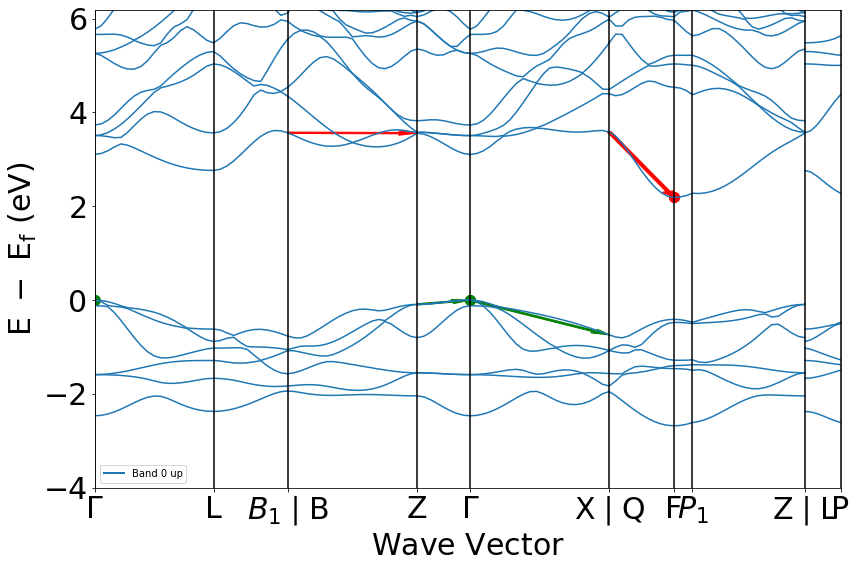

In [41]:
#On affiche les pentes sur la structure de bande
BSplot.get_plot(vbm_cbm_marker=True)
plt.arrow(Absbranches[minindexv][0],Ebranches['1'][minindexv][15][0],Absbranches[minindexv][-1]-Absbranches[minindexv][0],Ebranches['1'][minindexv][15][-1]-Ebranches['1'][minindexv][15][0],width = 0.03,length_includes_head=True,color='green') #Flèche pour la plus petite pente de la bande de valence
plt.arrow(Absbranches[maxindexv][0],Ebranches['1'][maxindexv][15][0],Absbranches[maxindexv][-1]-Absbranches[maxindexv][0],Ebranches['1'][maxindexv][15][-1]-Ebranches['1'][maxindexv][15][0],width = 0.03,length_includes_head=True,color='green') #Flèche pour la plus grande pente de la bande de valence
plt.arrow(Absbranches[minindexc][0],Ebranches['1'][minindexc][16][0],Absbranches[minindexc][-1]-Absbranches[minindexc][0],Ebranches['1'][minindexc][16][-1]-Ebranches['1'][minindexc][16][0],width = 0.03,length_includes_head=True,color='red') #Flèche pour la plus petite pente de la bande de conduction
plt.arrow(Absbranches[maxindexc][0],Ebranches['1'][maxindexc][16][0],Absbranches[maxindexc][-1]-Absbranches[maxindexc][0],Ebranches['1'][maxindexc][16][-1]-Ebranches['1'][maxindexc][16][0],width = 0.03,length_includes_head=True,color='red') #Flèche pour la plus grande pente de la bande de conduction
plt.show()

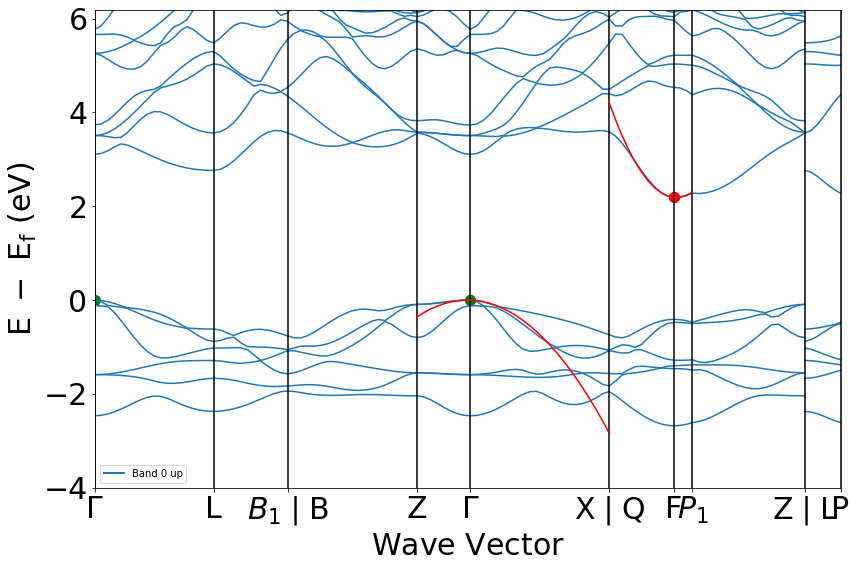

In [42]:
#Tableaux contenant les abscisses et ordonnées des branches pour la masse effective
#Abcisses
ZGamma_x = Absbranches[3] 
GammaX_x = Absbranches[4] 
QF_x = Absbranches[5] 
FP1_x = Absbranches[6] 
#Ordonnées
ZGamma_y15 = Ebranches['1'][3][15] 
GammaX_y15 = Ebranches['1'][4][15] 
QF_y16 = Ebranches['1'][5][16] 
FP1_y16 = Ebranches['1'][6][16] 


#On prend 3 points à droite et 3 points à gauche du maximum et du minimum
xv = np.append(ZGamma_x[-3:],GammaX_x[0:3]) 
xc = np.append(QF_x[-3:],FP1_x[0:3]) #Abscisses utilisées pour le fit de la parabole
yv = np.append(ZGamma_y15[-3:],GammaX_y15[0:3]) 
yc = np.append(QF_y16[-3:],FP1_y16[0:3]) #Ordonnées utilisées pour le fit de la parabole
coefv = np.polyfit(xv,yv,2) 
coefc = np.polyfit(xc,yc,2) #Coefficients obtenus pour le fit de la parabole
xvplot = np.append(ZGamma_x,GammaX_x) 
xcplot = np.append(QF_x,FP1_x) #Abscisses utilisées pour le plot
yvplot = np.append(ZGamma_y15,GammaX_y15) 
ycplot = np.append(QF_y16,FP1_y16) #Ordonnées utilisées pour le plot
BSplot.get_plot(vbm_cbm_marker=True) #Plot de la structure de bandes
plt.plot(xvplot,coefv[0]*xvplot**2+coefv[1]*xvplot+coefv[2],color='red') #Plot de la parabole pour la bande de valence
plt.plot(xcplot,coefc[0]*xcplot**2+coefc[1]*xcplot+coefc[2],color='red') #Plot de la parabole pour la bande de conduction
plt.show()

In [43]:
print("Le but est de déterminer la masse effective au sommet de la dernière bande de valence et à \n la base de la première bande de conduction.")
print("Au sommet de la bande de valence : \t","m_eff =" ,(sc.hbar)**2/(10**(-20)*sc.e*2*coefv[0]*sc.m_e),"[m_e]")
print("À la base de la bande de conduction : \t","m_eff = ",(sc.hbar)**2/(10**(-20)*sc.e*2*coefc[0]*sc.m_e),"[m_e]")
print("Ces valeurs sont obtenues en supposant que la dispersion est parabolique, et que la masse effective est isotrope")

Le but est de déterminer la masse effective au sommet de la dernière bande de valence et à 
 la base de la première bande de conduction.
Au sommet de la bande de valence : 	 m_eff = -1.455517508262761 [m_e]
À la base de la bande de conduction : 	 m_eff =  0.456582496915142 [m_e]
Ces valeurs sont obtenues en supposant que la dispersion est parabolique, et que la masse effective est isotrope
